In [2]:
import os
import pickle

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
pd.options.display.max_columns = 100
%matplotlib inline

In [6]:
def get_predictions(set_type, path = '../data/model/'):
    """Concat all feature set model predictions for a particular set
    
    Args:
        set_type: string 'train, test or dev'
        path: model data folder
    """
    assert set_type in ['train', 'test', 'dev']
    df = pd.read_csv(path + set_type +'.csv', encoding='latin1')
    df.set_index('full_set_id', inplace = True)
    suffix = "_" + set_type + '.csv'
    files = [x for x in os.listdir(path + 'model_predictions/') if x.endswith(suffix)]
    for file in files:
        print(file)
        df_preds = pd.read_csv(path + 'model_predictions/' + file, 
                               encoding='latin1', 
                               index_col = 0)
        if df_preds.shape[1] != 1:
            df_preds.set_index('full_set_id', drop = True, inplace = True)
        assert df_preds.shape[1] == 1
        col = "_".join(file.split("_")[:-1])
        df_preds.columns = ['m_' + col]
        df = pd.concat([df, df_preds], axis = 1)
    df.dropna(subset = ['broke_from_party'], inplace = True)
    return df
df_train = get_predictions('train') 
print('___')
df_dev = get_predictions('dev')
print('___')
#df_test = get_predictions('test')

amendment_votes_train.csv
bill_info_train.csv
bill_involvement_train.csv
district_econ_train.csv
district_geo_train.csv
ideology_train.csv
interest_train.csv
member_demos_train.csv
pac_general_train.csv
pac_industry_train.csv
votes_party_train.csv
___
amendment_votes_dev.csv
bill_info_dev.csv
bill_involvement_dev.csv
district_econ_dev.csv
district_geo_dev.csv
ideology_dev.csv
interest_dev.csv
member_demos_dev.csv
pac_general_dev.csv
pac_industry_dev.csv
votes_party_dev.csv
___


In [4]:
df_train.shape, df_dev.shape, df_test.shape

((989160, 22), (494803, 22), (164900, 22))

In [17]:
df_train.shape, df_dev.shape, df_test.shape

((989160, 22), (494803, 22), (164900, 22))

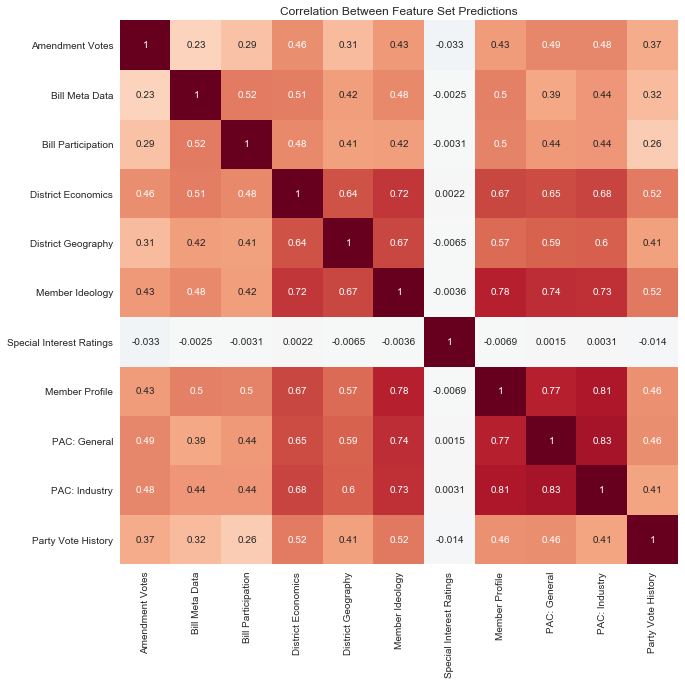

In [7]:
labels = {'m_amendment_votes': 'Amendment Votes', 
         'm_bill_info': 'Bill Meta Data', 
         'm_bill_involvement': 'Bill Participation', 
         'm_ideology': 'Member Ideology', 
         'm_member_demos': 'Member Profile', 
         'm_pac_general': 'PAC: General', 
         'm_pac_industry': 'PAC: Industry', 
         'm_votes_party': 'Party Vote History', 
          'm_district_econ': 'District Economics', 
          'm_district_geo': 'District Geography', 
          'm_interest': 'Special Interest Ratings'}
plt.rcParams['figure.figsize']=(10,10)
model_preds = [x for x in df_train.columns if x.startswith('m_')]
ax = sns.heatmap(df_train[model_preds].corr(), annot=True, cbar=False)
ax.set_title('Correlation Between Feature Set Predictions')
labels_list = [labels[x] for x in model_preds]
ax.set_xticklabels(labels_list)
ax.set_yticklabels(reversed(labels_list))

In [10]:
df_dev.m_interest.isnull().sum() / len(df_dev)

0.84873980149675732

In [12]:
df_test.m_interest.isnull().sum() / len(df_test)

0.95108550636749545

In [9]:
df_dev.head(100)

,member_id,party,vote_position,congress,roll_call,chamber,session,bill_id,majority_pos_rep,majority_pos_dem,broke_from_party,m_amendment_votes,m_bill_info,m_bill_involvement,m_district_econ,m_district_geo,m_ideology,m_interest,m_member_demos,m_pac_general,m_pac_industry,m_votes_party
full_set_id,,,,,,,,,,,,,,,,,,,,,,
291760,A000215,R,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0.0,NaN,0.540158,NaN,NaN,0.011736,0.209095,NaN,0.065601,NaN,NaN,0.400173
291761,A000217,R,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0.0,NaN,0.540158,NaN,NaN,0.061676,0.207433,NaN,0.089359,NaN,NaN,0.400173
291763,B000028,D,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0.0,NaN,0.540158,NaN,NaN,0.025425,0.004392,NaN,0.105465,NaN,NaN,0.400173
291765,B000081,D,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0.0,NaN,0.540158,NaN,NaN,0.035220,0.017657,NaN,0.045421,NaN,NaN,0.400173
291768,B000169,R,No,105.0,8.0,House,1.0,hres31-105,Yes,Yes,1.0,NaN,0.540158,NaN,NaN,0.047518,0.226630,NaN,0.045705,NaN,NaN,0.400173
291773,B000220,R,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0.0,NaN,0.540158,NaN,NaN,0.008472,0.099498,NaN,0.042483,NaN,NaN,0.400173
291780,B000461,R,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0.0,NaN,0.540158,NaN,NaN,0.058672,0.085039,NaN,0.030990,NaN,NaN,0.400173
291785,B000574,D,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0.0,NaN,0.540158,NaN,NaN,0.158199,0.045906,NaN,0.020513,NaN,NaN,0.400173
291789,B000617,R,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0.0,NaN,0.540158,NaN,NaN,0.020441,0.109853,NaN,0.066123,NaN,NaN,0.400173


In [4]:
def score_features():
    """Score Feature sets"""
    features = [x for x in df_train.columns if x.startswith('m_')]
    output = []
    for feature in features:
        stats = {}
        rows = df_train[feature].isnull() == False
        
        # find threshold that results in rate of party split consistent with train set
        rate = df_train.loc[rows,['broke_from_party']].mean()[0] 
        rows = df_dev[feature].isnull() == False
        model_dev = df_dev[rows]
        threshold = np.percentile(model_dev[feature], 100 - rate*100)
        stats['feature'] = feature
        stats['threshold'] = threshold
        
        y_pred = model_dev[feature] >= threshold
        y_true = model_dev.broke_from_party
        
        stats['precision'] = metrics.precision_score(y_true, y_pred)
        stats['recall'] = metrics.recall_score(y_true, y_pred)
        stats['f1'] = metrics.f1_score(y_true, y_pred)
        stats['f1_weighted'] = metrics.f1_score(y_true, y_pred, average = 'weighted')
        
        #get baseline stats
        t = [1] * int(len(model_dev) * rate)
        t += ([0] *(len(model_dev) - len(t)))
        t = shuffle(t)
        stats['bl_precision'] = metrics.precision_score(y_true, t)
        stats['bl_recall'] = metrics.recall_score(y_true, t)
        stats['bl_f1'] = metrics.f1_score(y_true, t)
        stats['bl_f1_weighted'] = metrics.f1_score(y_true, t, average = 'weighted')
        
        output.append(stats)
    return output
scores = score_features()
scores = pd.DataFrame(scores)
scores.sort_values('f1', ascending = True, inplace = True)
scores['Feature Set'] = scores.feature.apply(lambda x: labels[x])
scores.to_csv('scores.csv', index = False)
scores

,bl_f1,bl_f1_weighted,bl_precision,bl_recall,f1,f1_weighted,feature,precision,recall,threshold,Feature Set
2,0.050800,0.898643,0.050577,0.051026,0.245850,0.919446,m_bill_involvement,0.244633,0.247080,0.162527,Bill Participation
4,0.054991,0.895933,0.054747,0.055238,0.267993,0.919388,m_district_geo,0.266792,0.269205,0.163700,District Geography
9,0.053772,0.898701,0.053577,0.053968,0.291628,0.924164,m_votes_party,0.290565,0.292698,0.693289,Party Vote History
1,0.052162,0.898576,0.051892,0.052436,0.294395,0.924415,m_bill_info,0.292279,0.296541,0.814705,Bill Meta Data
3,0.031666,0.928009,0.031838,0.031496,0.354474,0.952006,m_district_econ,0.356366,0.352602,0.195632,District Economics
8,0.029608,0.935566,0.029600,0.029616,0.374717,0.958479,m_pac_industry,0.374567,0.374867,0.154266,PAC: Industry
7,0.045963,0.919337,0.045846,0.046080,0.387994,0.948254,m_pac_general,0.386984,0.389009,0.178710,PAC: General
6,0.051264,0.898230,0.051004,0.051526,0.412370,0.936965,m_member_demos,0.410276,0.414485,0.231838,Member Profile
0,0.093930,0.832696,0.093337,0.094531,0.418616,0.892641,m_amendment_votes,0.415922,0.421345,0.260180,Amendment Votes
5,0.055089,0.895027,0.054785,0.055397,0.475264,0.941705,m_ideology,0.472631,0.477927,0.250716,Member Ideology


## Logistic Regression

In [8]:
features = [x for x in df_train.columns if x.startswith('m_')]
df_train['n_models'] = len(features) - df_train[features].isnull().sum(axis = 1)
df_dev['n_models'] = len(features) - df_dev[features].isnull().sum(axis = 1)
df_test['n_models'] = len(features) - df_test[features].isnull().sum(axis = 1)

In [88]:
def process_features(df):
    """Impute Nans and add Interaction Effects
    Args:
        df: A model set dataframe
    Returns:
        Processed dataframe with just predictive features
    """
    # Replace nans with mean for that column
    features = [x for x in df.columns if x.startswith('m_')]
    #df_null = df[features].isnull()
    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    df = pd.DataFrame(imp.fit_transform(df[features]), columns=features, index=df.index)
    #df = pd.concat([df, df_null], axis = 1)
    
    # get interaction effects
    poly = PolynomialFeatures(degree=3, interaction_only=True)
    df = pd.DataFrame(poly.fit_transform(df), index = df.index)
    return df
dfs = df_train, df_dev, df_test
model_train, model_dev, model_test = map(process_features, dfs)

In [51]:
path = "../data/model/final_preds/"
model_train.to_csv(path + 'train.csv', index = False)
model_dev.to_csv(path + 'dev.csv', index = False)
model_test.to_csv(path + 'test.csv', index = False)

In [55]:
df_test.loc[:, ['broke_from_party']].to_csv(path + 'test_y.csv', index= False)
df_dev.loc[:, ['broke_from_party']].to_csv(path + 'dev_y.csv', index= False)
df_train.loc[:, ['broke_from_party']].to_csv(path + 'train_y.csv', index= False)

In [89]:
lgr = LogisticRegression(C = .001)
lgr.fit(model_train, df_train.broke_from_party)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

C:\Users\Steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


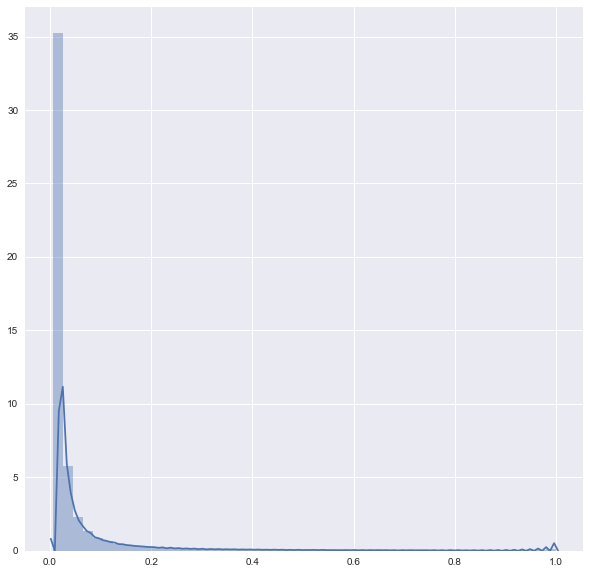

In [90]:
probs_dev = lgr.predict_proba(model_dev)[:,1]
probs_train = lgr.predict_proba(model_train)[:,1]
probs_test = lgr.predict_proba(model_test)[:,1]
probs_all = [probs_train, probs_dev, probs_test]
sns.distplot(probs_dev)

In [ ]:
rate = df_train['broke_from_party'].mean()
thresh= np.percentile(probs_dev, 100 - rate*100)
print((probs_dev >= thresh).sum())
print(metrics.classification_report(df_dev['broke_from_party'], probs_dev >= thresh, digits=4))

In [65]:
rate = df_train['broke_from_party'].mean()
thresh= np.percentile(probs_dev, 100 - rate*100)
print((probs_dev >= thresh).sum())
print(metrics.classification_report(df_dev['broke_from_party'], probs_dev >= thresh, digits=4))

26667
             precision    recall  f1-score   support

          0     0.9709    0.9704    0.9707    468404
          1     0.4796    0.4845    0.4820     26399

avg / total     0.9447    0.9445    0.9446    494803



In [66]:
for n_models in df_dev.n_models.unique():
    i = df_dev.n_models == n_models
    i_t = df_train.n_models == n_models
    rate = df_train.loc[i_t,'broke_from_party'].mean()
    
    
    y_pred = pd.Series(probs_dev, index = i.index)[i]
    thresh= np.percentile(y_pred, 100 - rate*100)
    y_true = df_dev.loc[i, 'broke_from_party']
    y_pred =  y_pred >= thresh
    f1 = metrics.f1_score(y_true, y_pred)
    print(n_models, f1)

5 0.443687114573
4 0.391014975042
3 0.307692307692
2 0.3
6 0.471532922344
7 0.51227051921
8 0.488995598239
1 0.207792207792
0 0.00793650793651
9 0.49629061141
10 0.526912181303


In [131]:
def normalize_and_export(dfs, probs, ret = True):
    """Combines final prediction, Normalizes all probabilities and exports
    Args:
        dfs: List of Model dataframes with probabilities [Train, Dev, Test]
        probs: Probabilities of final model [Train, Dev, Test]
        
    """
    
    df = pd.concat(dfs)
    df = df.reset_index()
    prob = pd.concat([pd.Series(x) for x in probs])
    df['m_ensemble'] = prob.tolist()
    features = [x for x in df.columns if x.startswith('m_')]
    
    df_models = df[features].rank(pct = True)
    df_models.applymap(lambda x: round(x, 3))
    
    #rate = df['broke_from_party'].mean()
    #rate = 100 - rate*100
    #df_thresholds = df_models.apply(lambda x: np.nanpercentile(x, rate))
    
    df = pd.concat([df[['full_set_id', 'member_id', 'bill_id', 'broke_from_party']], df_models], axis = 1)
    df.to_csv('../data/model/predictions.csv', index = False)
    
    if ret:
        return df
    
    
df_predictions = normalize_and_export([df_train, df_dev, df_test], probs_all)

In [152]:
df_predictions = pd.read_csv('../data/model/predictions.csv')

In [157]:
c1 = df_predictions.bill_id == "hr1628-115"
c2 = df_predictions.member_id == 'M000303'
df_predictions[c2]

,full_set_id,member_id,bill_id,broke_from_party,m_amendment_votes,m_bill_info,m_bill_involvement,m_district_econ,m_district_geo,m_ideology,m_member_demos,m_pac_general,m_pac_industry,m_votes_party,m_ensemble,ensemble_bin
1530,294337,M000303,hjres36-105,0,NaN,0.894045,0.742908,NaN,NaN,0.945835,0.925852,NaN,NaN,NaN,0.867754,"(0.85, 0.9]"
1587,294435,M000303,sres55-105,0,NaN,0.697387,NaN,NaN,0.954019,0.769114,0.792930,NaN,NaN,0.658341,0.814727,"(0.8, 0.85]"
2642,296209,M000303,sres47-105,0,NaN,0.117756,NaN,NaN,0.655593,0.602732,0.349850,NaN,NaN,NaN,0.404844,"(0.4, 0.45]"
4446,299213,M000303,sjres22-105,0,NaN,0.117756,NaN,NaN,0.256819,0.549281,0.548305,NaN,NaN,NaN,0.364689,"(0.35, 0.4]"
5034,300161,M000303,sjres18-105,0,NaN,0.952230,NaN,NaN,0.408147,0.940258,0.894373,NaN,NaN,0.933135,0.946281,"(0.9, 0.95]"
6325,302349,M000303,sres39-105,0,NaN,0.117756,NaN,NaN,0.558200,0.629933,0.407621,NaN,NaN,NaN,0.397013,"(0.35, 0.4]"
6864,303259,M000303,sjres5-105,0,NaN,0.502590,NaN,NaN,0.553921,0.656268,0.546423,NaN,NaN,NaN,0.541844,"(0.5, 0.55]"
6924,303359,M000303,sjres1-105,0,NaN,0.645975,NaN,NaN,0.575202,0.824453,0.556248,NaN,NaN,NaN,0.661408,"(0.65, 0.7]"
8217,305548,M000303,sres75-105,0,NaN,0.984927,NaN,NaN,0.866448,0.879114,0.988986,NaN,NaN,NaN,0.917746,"(0.9, 0.95]"
8277,305645,M000303,s495-105,0,NaN,0.469663,NaN,NaN,0.510769,0.669171,0.555604,NaN,NaN,0.735621,0.648900,"(0.6, 0.65]"


In [201]:
import importlib
sns = importlib.reload(sns)

C:\Users\Steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


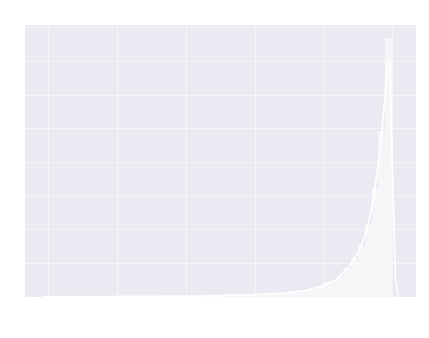

In [212]:
plt.rcParams['figure.figsize']=(7,5)
c1 = df_predictions.broke_from_party == 1
c2 = df_predictions.broke_from_party == 0
with plt.rc_context({'axes.edgecolor':'white', 
                     'xtick.color':'white', 
                     'ytick.color':'white', 
                     'figure.facecolor':'white', 'grid.alpha': .5, 
                     'axes.labelcolor':'white', 'axes.labelsize': 14, 'axes.titlesize': 16}):
    ax = sns.distplot(df_predictions.loc[c1, 'm_ensemble'], color='white', hist_kws=dict(alpha=.6))
    ax.set_title('Ensemble Performance: Members who Broke with Party ', color = 'white')
    ax.set_xlabel('Predicted Probabilities')

plt.savefig('probabilites.png', transparent = True)

C:\Users\Steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


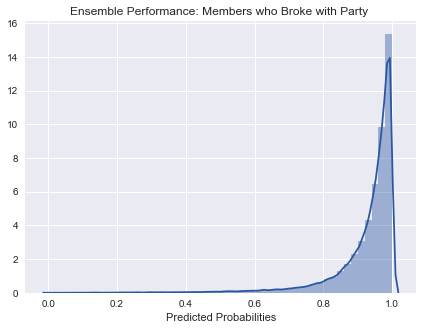

In [214]:
plt.rcParams['figure.figsize']=(7,5)
c1 = df_predictions.broke_from_party == 1
c2 = df_predictions.broke_from_party == 0

ax = sns.distplot(df_predictions.loc[c1, 'm_ensemble'], color='#2856a0', hist_kws=dict(alpha=.4))
ax.set_title('Ensemble Performance: Members who Broke with Party ')
ax.set_xlabel('Predicted Probabilities')

plt.savefig('probabilites2.png')

In [196]:
plt.rcParams.keys()

['_internal.classic_mode',
 'agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate',
 'animation.codec',
 'animation.convert_args',
 'animation.convert_path',
 'animation.ffmpeg_args',
 'animation.ffmpeg_path',
 'animation.frame_format',
 'animation.html',
 'animation.mencoder_args',
 'animation.mencoder_path',
 'animation.writer',
 'axes.autolimit_mode',
 'axes.axisbelow',
 'axes.edgecolor',
 'axes.facecolor',
 'axes.formatter.limits',
 'axes.formatter.offset_threshold',
 'axes.formatter.use_locale',
 'axes.formatter.use_mathtext',
 'axes.formatter.useoffset',
 'axes.grid',
 'axes.grid.axis',
 'axes.grid.which',
 'axes.hold',
 'axes.labelcolor',
 'axes.labelpad',
 'axes.labelsize',
 'axes.labelweight',
 'axes.linewidth',
 'axes.prop_cycle',
 'axes.spines.bottom',
 'axes.spines.left',
 'axes.spines.right',
 'axes.spines.top',
 'axes.titlepad',
 'axes.titlesize',
 'axes.titleweight',
 'axes.unicode_minus',
 'axes.xmargin',
 'axes.ymargin',
 'axes3d

In [189]:
c1 = df_predictions.m_ensemble > .8
c2 = df_predictions.broke_from_party == 0
(c1 & c2).sum() / c2.sum()

0.15925477572714927

In [187]:
c1.sum()

329773

In [160]:
features

['m_amendment_votes',
 'm_bill_info',
 'm_bill_involvement',
 'm_district_econ',
 'm_district_geo',
 'm_ideology',
 'm_member_demos',
 'm_pac_general',
 'm_pac_industry',
 'm_votes_party']

In [184]:
over_thresh = (df_predictions[features] >.80).any(axis = 1).apply(lambda x:(int(x)))
y_true = df_predictions.iloc[len(df_train):,:]['broke_from_party']
#print(metrics.classification_report(df_predictions['broke_from_party'], over_thresh, digits=4))
y_pred = over_thresh.iloc[len(df_train):]
print(metrics.classification_report(y_true, y_pred, digits=4))

             precision    recall  f1-score   support

          0     0.9952    0.4874    0.6543    624593
          1     0.0951    0.9580    0.1730     35110

avg / total     0.9473    0.5124    0.6287    659703



In [176]:
metrics.classification_report?

In [175]:
len(df_train)

989160

In [182]:
y_true = df_predictions.iloc[len(df_train):,:]['broke_from_party']
#print(metrics.classification_report(df_predictions['broke_from_party'], over_thresh, digits=4))
y_pred = df_predictions.iloc[len(df_train):]['m_ensemble'] > .80
print(metrics.classification_report(y_true, y_pred, digits=4))

             precision    recall  f1-score   support

          0     0.9894    0.8347    0.9055    624593
          1     0.2225    0.8413    0.3519     35110

avg / total     0.9486    0.8351    0.8760    659703



In [183]:
print(metrics.classification_report(df_predictions['broke_from_party'], df_predictions.m_ensemble > .8 , digits=4))

             precision    recall  f1-score   support

          0     0.9946    0.8407    0.9112   1560443
          1     0.2464    0.9191    0.3886     88420

avg / total     0.9545    0.8449    0.8832   1648863



In [156]:
df_predictions['ensemble_bin'] = pd.cut(df_predictions.m_ensemble, bins = 20)

In [159]:
df_predictions.groupby(['ensemble_bin', 'broke_from_party']).size()

ensemble_bin       broke_from_party
(-0.000999, 0.05]  0                   82433
                   1                      11
(0.05, 0.1]        0                   82414
                   1                      29
(0.1, 0.15]        0                   82394
                   1                      49
(0.15, 0.2]        0                   82393
                   1                      50
(0.2, 0.25]        0                   82356
                   1                      87
(0.25, 0.3]        0                   82322
                   1                     121
(0.3, 0.35]        0                   82311
                   1                     132
(0.35, 0.4]        0                   82291
                   1                     152
(0.4, 0.45]        0                   82255
                   1                     188
(0.45, 0.5]        0                   82177
                   1                     267
(0.5, 0.55]        0                   82077
                   

In [113]:
df_train.head()

,member_id,party,vote_position,congress,roll_call,chamber,session,bill_id,majority_pos_rep,majority_pos_dem,broke_from_party,m_amendment_votes,m_bill_info,m_bill_involvement,m_district_econ,m_district_geo,m_ideology,m_member_demos,m_pac_general,m_pac_industry,m_votes_party,n_models
full_set_id,,,,,,,,,,,,,,,,,,,,,,
291756,A000022,D,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0,NaN,0.540158,NaN,NaN,0.032267,0.014057,0.081888,NaN,NaN,0.400173,5
291757,A000055,R,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0,NaN,0.540158,NaN,NaN,0.044979,NaN,0.054105,NaN,NaN,0.400173,4
291758,A000357,D,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0,NaN,0.540158,NaN,NaN,0.029681,NaN,0.071788,NaN,NaN,0.400173,4
291759,A000210,D,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0,NaN,0.540158,NaN,NaN,0.018217,0.017461,0.108348,NaN,NaN,0.400173,5
291762,B000013,R,Yes,105.0,8.0,House,1.0,hres31-105,Yes,Yes,0,NaN,0.540158,NaN,NaN,0.049995,0.119773,0.080094,NaN,NaN,0.400173,5


In [68]:
df_test[features].head()

,m_amendment_votes,m_bill_info,m_bill_involvement,m_district_econ,m_district_geo,m_ideology,m_member_demos,m_pac_general,m_pac_industry,m_votes_party
full_set_id,,,,,,,,,,
291774,NaN,0.540158,NaN,NaN,0.176642,0.089668,0.073540,NaN,NaN,0.400173
291777,NaN,0.540158,NaN,NaN,0.017815,0.026487,0.089109,NaN,NaN,0.400173
291784,NaN,0.540158,NaN,NaN,0.024529,0.172238,0.071137,NaN,NaN,0.400173
291790,NaN,0.540158,NaN,NaN,0.000000,0.016637,0.037369,NaN,NaN,0.400173
291813,NaN,0.540158,NaN,NaN,0.016410,0.070587,0.083902,NaN,NaN,0.400173


In [44]:
metrics.f1_score?